<a href="https://colab.research.google.com/github/95djibi/95djibi/blob/main/projet_groupe6modele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
file = files.upload()

Saving Daily Prices_NEW.csv to Daily Prices_NEW (1).csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import Dense

In [22]:
df = pd.read_csv('Daily Prices_NEW.csv')

In [23]:
df.head(5)
df.columns

Index(['Date', 'London futures (£ sterling/tonne)',
       'New York futures (US$/tonne)', 'ICCO daily price (US$/tonne)',
       'ICCO daily price (Euro/tonne)'],
      dtype='object')

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df = df.sort_values(by='Date')

In [25]:
df.head(5)

,London futures (£ sterling/tonne),New York futures (US$/tonne),ICCO daily price (US$/tonne),ICCO daily price (Euro/tonne)
Date,,,,
1994-10-03,997.83,"1,363.33","1,466.24","1,466.00"
1994-10-04,995.50,"1,358.33","1,462.28","1,462.00"
1994-10-05,969.83,"1,326.00","1,430.57","1,431.00"
1994-10-06,971.83,"1,322.33","1,430.32","1,430.00"
1994-10-07,961.33,"1,307.67","1,416.46","1,416.00"


In [26]:
df.shape

(7573, 4)

In [27]:
colonnes_a_modifier = ['London futures (£ sterling/tonne)', 'New York futures (US$/tonne)', 'ICCO daily price (US$/tonne)','ICCO daily price (Euro/tonne)']

for colonne in colonnes_a_modifier:
  df[colonne] = df[colonne].str.replace(',', '')

# Convertir les colonnes en type numérique
for colonne in colonnes_a_modifier:
  df[colonne] = pd.to_numeric(df[colonne])
df.dtypes

London futures (£ sterling/tonne)    float64
New York futures (US$/tonne)         float64
ICCO daily price (US$/tonne)         float64
ICCO daily price (Euro/tonne)        float64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7573 entries, 1994-10-03 to NaT
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   London futures (£ sterling/tonne)  7573 non-null   float64
 1   New York futures (US$/tonne)       7573 non-null   float64
 2   ICCO daily price (US$/tonne)       7573 non-null   float64
 3   ICCO daily price (Euro/tonne)      7573 non-null   float64
dtypes: float64(4)
memory usage: 295.8 KB


In [29]:
df.describe()

,London futures (£ sterling/tonne),New York futures (US$/tonne),ICCO daily price (US$/tonne),ICCO daily price (Euro/tonne)
count,7573.000000,7573.00000,7573.000000,7573.000000
mean,1460.915909,2129.99989,2163.065440,1851.568780
std,601.940515,781.47479,775.822551,621.420603
min,546.330000,734.00000,774.100000,677.000000
25%,960.000000,1488.00000,1549.240000,1394.000000
50%,1491.670000,2164.33000,2170.990000,1806.000000
75%,1834.000000,2662.00000,2648.290000,2169.000000
max,7615.670000,9094.67000,9361.390000,8645.710000


In [30]:
print(df.isnull().sum())

London futures (£ sterling/tonne)    0
New York futures (US$/tonne)         0
ICCO daily price (US$/tonne)         0
ICCO daily price (Euro/tonne)        0
dtype: int64


In [49]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Définir la taille du jeu de données
num_samples = 1000

# Définir la dimension d'entrée
input_dim = 4

# Générer les données d'entrée aléatoirement
X = np.random.rand(num_samples, input_dim)

# Générer les étiquettes (labels) correspondantes
y = np.random.randint(2, size=num_samples)

# Création du modèle
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X, y, epochs=400, batch_size=32)

Epoch 1/400
32/32 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5190
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5140
Epoch 3/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5240
Epoch 4/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5200
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5300
Epoch 6/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5240
Epoch 7/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5370
Epoch 8/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5300
Epoch 9/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5350
Epoch 10/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5340
Epoch 11/

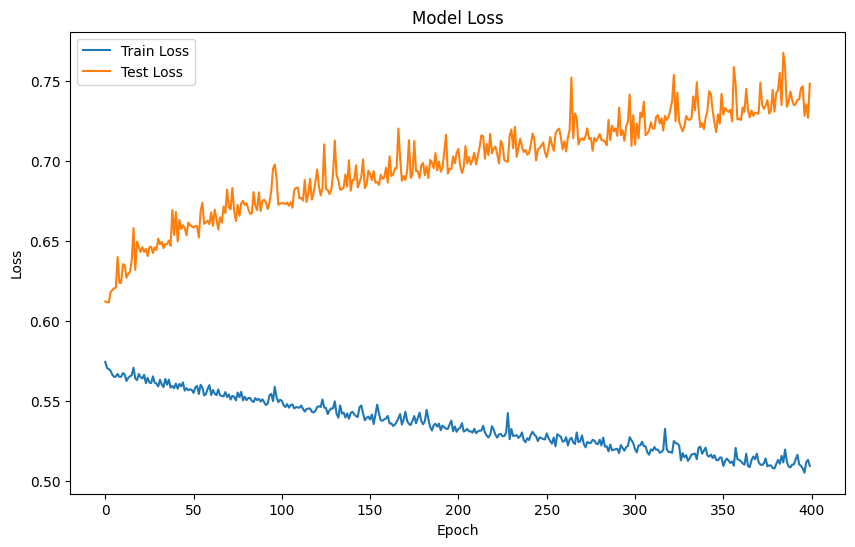

In [52]:




# Tracer les graphiques de performance
plt.figure(figsize=(10, 6))
plt.plot(historique_entrainement.history['loss'], label='Train Loss')
# Accéder à 'val_loss' maintenant qu'il existe
plt.plot(historique_entrainement.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

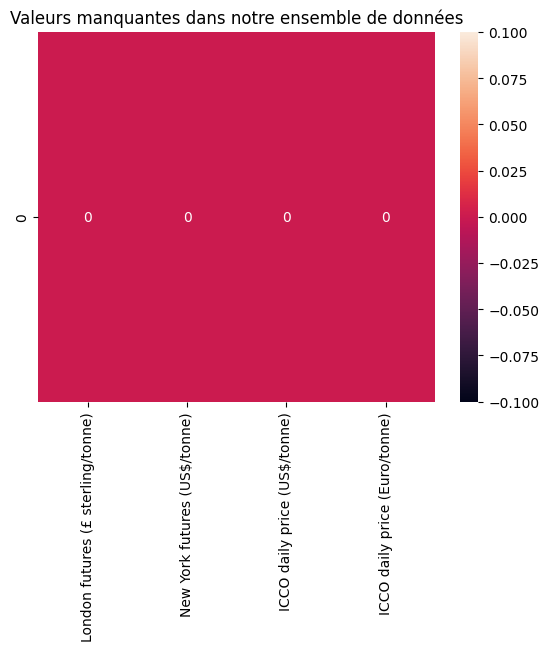

In [ ]:

sns.heatmap(pd.DataFrame(df.isna().sum()).T,annot=True)
plt.title('Valeurs manquantes dans notre ensemble de données')
plt.show()

In [41]:
df = df.dropna(axis=0)

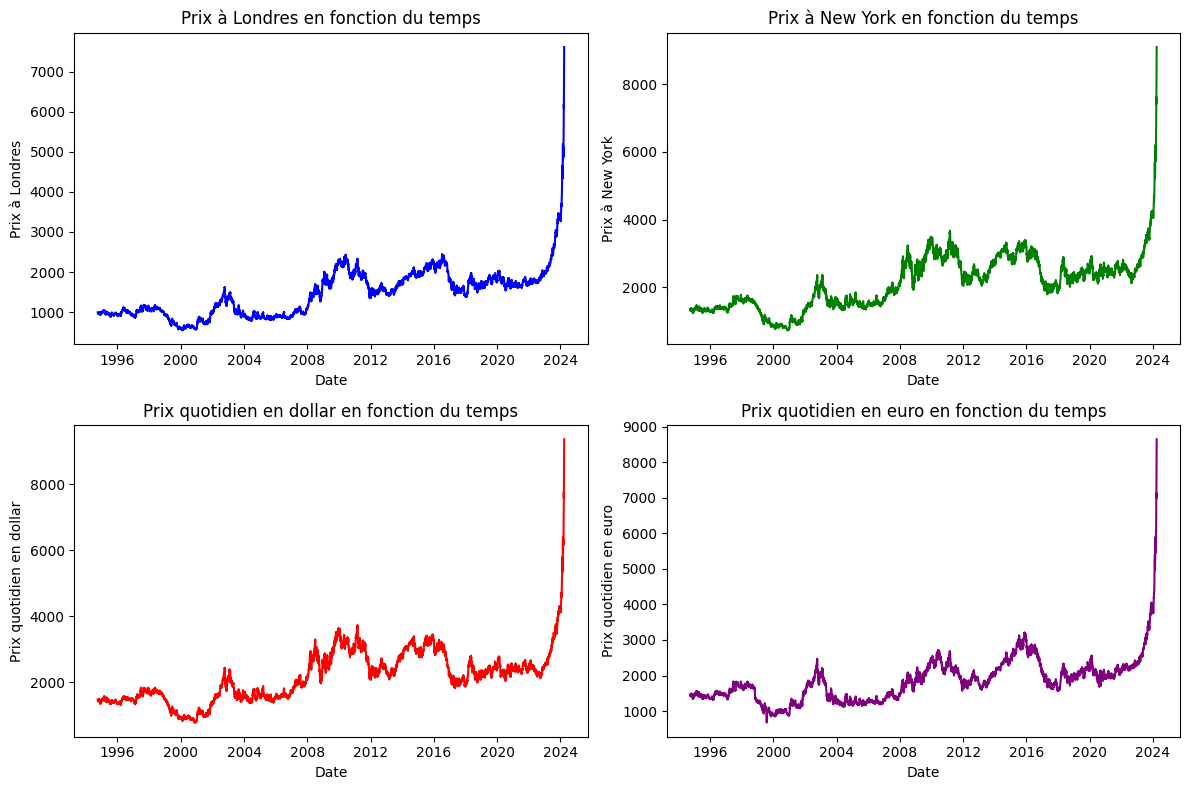

In [53]:
# Création d'une figure avec plusieurs sous-graphiques
df.reset_index(inplace=True)
plt.figure(figsize=(12, 8))

# Sous-graphique pour le prix à Londres
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df["London futures (£ sterling/tonne)"], color='blue')
plt.xlabel('Date')
plt.ylabel('Prix à Londres')
plt.title('Prix à Londres en fonction du temps')

# Sous-graphique pour le prix à New York
plt.subplot(2, 2, 2)
plt.plot(df['Date'], df["New York futures (US$/tonne)"], color='green')
plt.xlabel('Date')
plt.ylabel('Prix à New York')
plt.title('Prix à New York en fonction du temps')

# Sous-graphique pour le prix quotidien en dollar
plt.subplot(2, 2, 3)
plt.plot(df['Date'], df["ICCO daily price (US$/tonne)"], color='red')
plt.xlabel('Date')
plt.ylabel('Prix quotidien en dollar')
plt.title('Prix quotidien en dollar en fonction du temps')

# Sous-graphique pour le prix quotidien en euro
plt.subplot(2, 2, 4)
plt.plot(df['Date'], df["ICCO daily price (Euro/tonne)"], color='purple')
plt.xlabel('Date')
plt.ylabel('Prix quotidien en euro')
plt.title('Prix quotidien en euro en fonction du temps')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique global
plt.show()

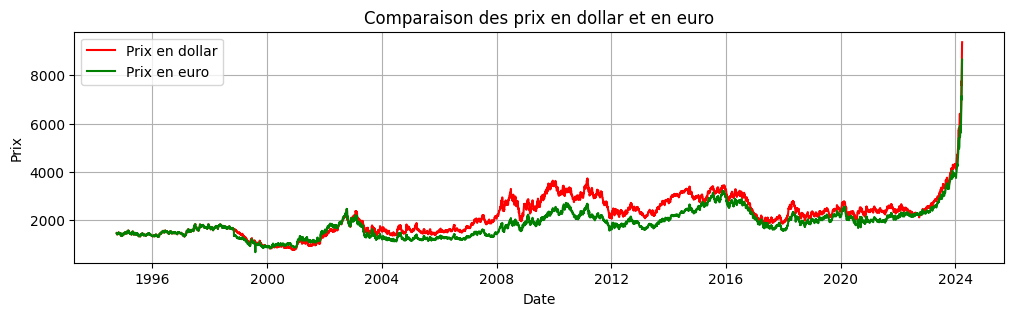

In [45]:
plt.figure(figsize=(12, 3))
plt.plot(df['Date'], df["ICCO daily price (US$/tonne)"], label='Prix en dollar', color='red')
plt.plot(df['Date'], df["ICCO daily price (Euro/tonne)"], label='Prix en euro', color='green')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Comparaison des prix en dollar et en euro')
plt.legend()
plt.grid(True)
plt.show()

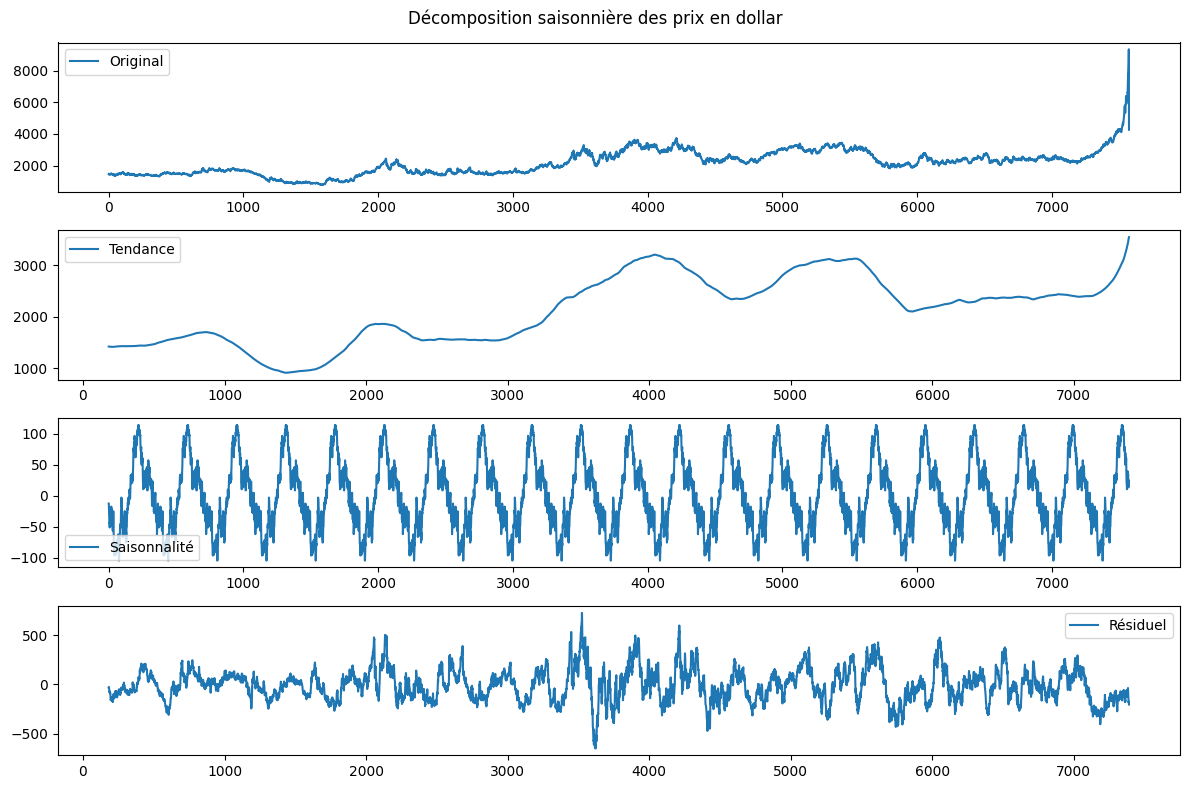

In [46]:
# Décomposition saisonnière des prix en dollar
result = seasonal_decompose(df["ICCO daily price (US$/tonne)"], model='additive', period=365)  # Période approximative d'un mois

# Visualisation de la décomposition saisonnière
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df["ICCO daily price (US$/tonne)"], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendance')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Saisonnalité')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Résiduel')
plt.legend()

plt.suptitle('Décomposition saisonnière des prix en dollar')
plt.tight_layout()
plt.show()

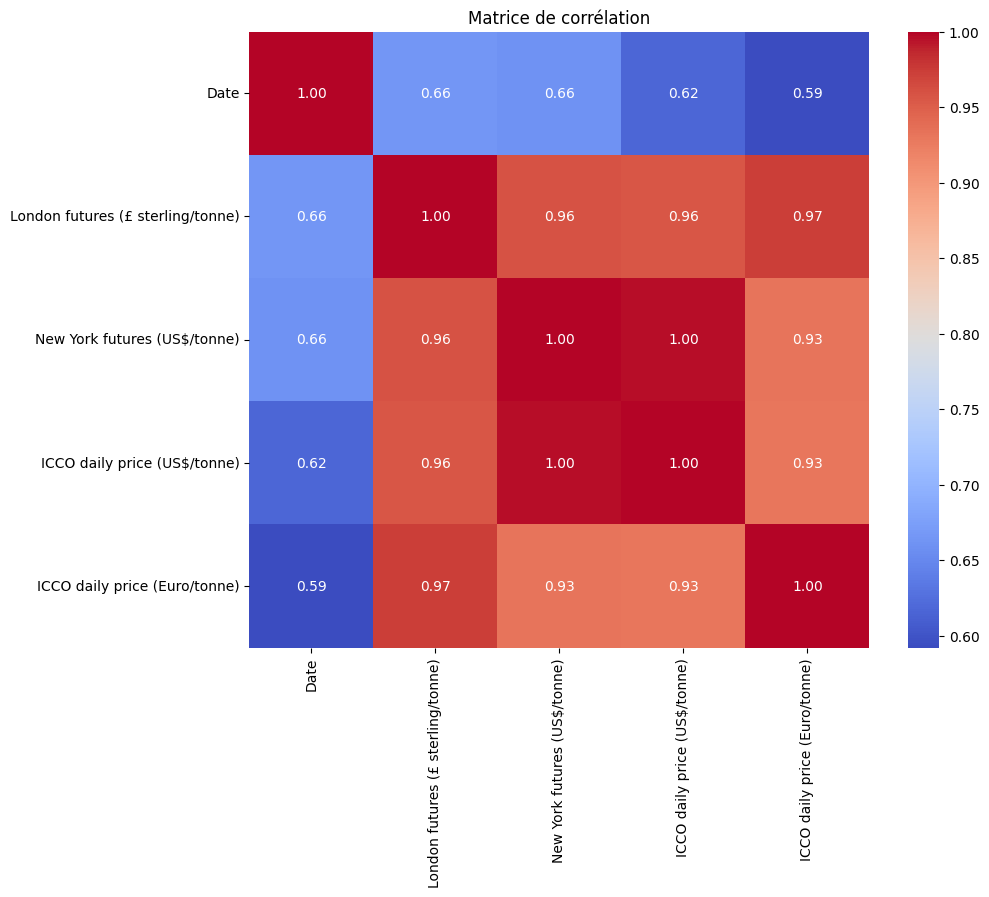

In [47]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()